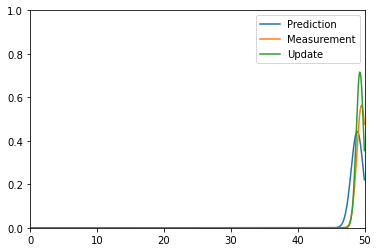

In [1]:
from __future__ import print_function, division
from random import gauss
from math import sqrt, exp, pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def f(mean, var, x):
    return exp(-0.5*(x-mean)**2/var)/sqrt(2*pi*var)

def update(mean1, var1, mean2, var2):
    new_mean = (var2*mean1 + var1*mean2)/(var1 + var2)
    new_var = 1/(1/var1 + 1/var2)
    return new_mean, new_var

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return new_mean, new_var

measurement_var = 0.5
motion_var = 0.5
measurements = [gauss(i, measurement_var) for i in range(50)]
motion = [gauss(1, motion_var) for i in range(50)]
mean = 0
var = 10000
x_pts = [i/10 for i in range(500)]

#plt.ion()
fig, ax = plt.subplots()

'''for meas, move in zip(measurements, motion):
    mean, var = predict(mean, var, move, motion_var)
    y1 = [f(mean, var, x) for x in x_pts]
    mean, var = update(mean, var, meas, measurement_var)
    y2 = [f(meas, measurement_var, x) for x in x_pts]
    y3 = [f(mean, var, x) for x in x_pts]
    ax.cla()
    ax.plot(x_pts, y1, 'r-')
    ax.plot(x_pts, y2, 'g-')
    ax.plot(x_pts, y3, 'b-')
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 1)
    ax.legend(("Prediction", "Measurement", "Update"))
    plt.pause(1e-1)'''

y1, = ax.plot(x_pts,x_pts)
y2, = ax.plot(x_pts,x_pts)
y3, = ax.plot(x_pts,x_pts)
def animate(i):
    global mean, var
    mean, var = predict(mean, var, motion[i], motion_var)
    y1_pts = [f(mean, var, x) for x in x_pts]
    mean, var = update(mean, var, measurements[i], measurement_var)
    y2_pts = [f(measurements[i], measurement_var, x) for x in x_pts]
    y3_pts = [f(mean, var, x) for x in x_pts]
    y1.set_ydata(y1_pts)
    y2.set_ydata(y2_pts)
    y3.set_ydata(y3_pts)
    return y1, y2, y3,

def init():
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 1)
    ax.legend(("Prediction", "Measurement", "Update"))
    return y1, y2, y3,

anim = animation.FuncAnimation(fig, animate, 50, interval=100, init_func=init)
#plt.show()
anim.save("kalman_1d.gif", writer="imagemagick")

